Here's a brief description of some of the columns:

_ingested_at: Timestamp of when the data was ingested.
lead_id: Unique identifier for each lead.
at_date: Date information.
request_amount: Requested amount.
sale: Sale information (1 indicates a sale, 0 or "nan" indicates no sale).
sale_amount: Amount of the sale.
sale_date: Date of the sale.
lead_beendet__kredit_storniert: Information related to the lead status (0 indicates not canceled).
tracking: Contains tracking information, possibly related to advertising.

2023-05-10T03:23:45.006789,7ac64a9f-344b-4c76-86a9-20990d3546b3,2023-01-02,"98815,2",1,2422800,2023-02-11,1,"adID:163824,platform:Andorid"
2023-05-10T11:10:31.001234,7ac64a9f-344b-4c76-86a9-20990d3546b3,2023-01-02,"98815,2",1,24228,2023-02-11,1,"adID:163824,platform:Andorid"

2023-05-10T03:23:45.006789,9a5a3929-9836-4f0d-acf2-34a2fe63d1a8,2023-02-19,"39471,31",0,3947131,2023-02-09,0,"adID:110746,platform:mWeb"
2023-05-10T03:23:45.006789,9a5a3929-9836-4f0d-acf2-34a2fe63d1a8,2023-02-19,"39471,31",0,3947131,2023-02-09,0,"adID:110746,platform:mWeb"
2023-05-10T03:23:45.006789,9a5a3929-9836-4f0d-acf2-34a2fe63d1a8,2023-02-19,"39471,31",0,3947131,2023-02-09,0,"adID:110746,platform:mWeb"

In [1]:
import pandas as pd
import matplotlib
# matplotlib.cbook.mplDeprecation = False
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Load the CSV file into a Pandas DataFrame and apply the lambda functions to the appropriate columns
df = pd.read_csv('mobile_code_challenge_de.csv', 
                 decimal=',', 
                 parse_dates=['_ingested_at'],
                 date_format='%Y-%m-%dT%H:%M:%S.%f')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   _ingested_at                    1520 non-null   datetime64[ns]
 1   lead_id                         1520 non-null   object        
 2   at_date                         1520 non-null   object        
 3   request_amount                  1520 non-null   float64       
 4   sale                            1520 non-null   int64         
 5   sale_amount                     317 non-null    float64       
 6   sale_date                       327 non-null    object        
 7   lead_beendet__kredit_storniert  1520 non-null   int64         
 8   tracking                        1520 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 107.0+ KB


In [4]:
df.head(3)

,_ingested_at,lead_id,at_date,request_amount,sale,sale_amount,sale_date,lead_beendet__kredit_storniert,tracking
0,2023-05-09 10:50:21.001234,d6b9c5c4-fb78-4d4c-b300-9a2ed3613c3e,2023-01-01,51027.57,1,51027.57,2023-01-22,0,"adID:114125,platform:Andorid"
1,2023-05-10 03:23:45.006789,d6b9c5c4-fb78-4d4c-b300-9a2ed3613c3e,2023-01-01,51027.57,1,5102757.00,2023-01-22,0,"adID:114125,platform:Andorid"
2,2023-05-10 11:10:31.001234,d6b9c5c4-fb78-4d4c-b300-9a2ed3613c3e,2023-01-01,51027.57,1,51027.57,2023-01-22,0,"adID:114125,platform:Andorid"


In [5]:
# Group the data by the ID column and get the index of the row with the maximum timestamp for each group
idx = df.groupby('lead_id')['_ingested_at'].idxmax()

# Filter the original DataFrame using the index of the rows with the maximum timestamp for each group
df_filtered = df.loc[idx]

In [6]:
df_filtered.head(3)

,_ingested_at,lead_id,at_date,request_amount,sale,sale_amount,sale_date,lead_beendet__kredit_storniert,tracking
293,2023-05-10 11:10:31.001234,00c27a47-f956-4744-8c5f-1b45c0de5774,2023-01-24,9711.95,1,9711.95,2023-03-17,0,"adID:118890,platform:iOS"
638,2023-05-10 11:10:31.001234,011d0f8f-dc31-4018-b8dd-b3f72a28fe9d,2023-02-20,25850.28,1,25850.28,2023-02-26,0,"adID:286299,platform:Andorid"
422,2023-05-10 11:10:31.001234,01b2438f-e02e-4966-9ff8-655108bd6c76,2023-02-05,62906.58,0,NaN,NaN,0,"adID:36586,platform:iOS"


In [7]:
# Filter the rows where the floats in column1 and column2 are equal when the decimal point is removed
mask = (round(df_filtered['request_amount'] * 100)) == df_filtered['sale_amount']
incorrect_rows = df_filtered[mask]

In [8]:
incorrect_rows

,_ingested_at,lead_id,at_date,request_amount,sale,sale_amount,sale_date,lead_beendet__kredit_storniert,tracking
959,2023-05-10 03:23:45.006789,90464814-45a5-4673-9b5e-09e86f3020cf,2023-03-19,16885.60,0,1688560.0,2023-03-09,0,"adID:111505,platform:Desktop"
621,2023-05-10 03:23:45.006789,9a5a3929-9836-4f0d-acf2-34a2fe63d1a8,2023-02-19,39471.31,0,3947131.0,2023-02-09,0,"adID:110746,platform:mWeb"


In [9]:
idx = incorrect_rows.index
df_filtered.loc[idx, 'sale_amount'] = df_filtered.loc[idx, 'request_amount']

In [10]:
df_filtered.loc[idx]

,_ingested_at,lead_id,at_date,request_amount,sale,sale_amount,sale_date,lead_beendet__kredit_storniert,tracking
959,2023-05-10 03:23:45.006789,90464814-45a5-4673-9b5e-09e86f3020cf,2023-03-19,16885.60,0,16885.60,2023-03-09,0,"adID:111505,platform:Desktop"
621,2023-05-10 03:23:45.006789,9a5a3929-9836-4f0d-acf2-34a2fe63d1a8,2023-02-19,39471.31,0,39471.31,2023-02-09,0,"adID:110746,platform:mWeb"


In [14]:
# Extract the key-value pairs into separate columns
df_filtered[['adID', 'platform']] = df_filtered['tracking'].str.split(',').apply(lambda x: pd.Series([i.split(':')[1] for i in x]))

In [15]:
df_filtered.head(3)

,_ingested_at,lead_id,at_date,request_amount,sale,sale_amount,sale_date,lead_beendet__kredit_storniert,tracking,traking_temp,adID,platform
293,2023-05-10 11:10:31.001234,00c27a47-f956-4744-8c5f-1b45c0de5774,2023-01-24,9711.95,1,9711.95,2023-03-17,0,"adID:118890,platform:iOS","[adID:118890, platform:iOS]",118890,iOS
638,2023-05-10 11:10:31.001234,011d0f8f-dc31-4018-b8dd-b3f72a28fe9d,2023-02-20,25850.28,1,25850.28,2023-02-26,0,"adID:286299,platform:Andorid","[adID:286299, platform:Andorid]",286299,Andorid
422,2023-05-10 11:10:31.001234,01b2438f-e02e-4966-9ff8-655108bd6c76,2023-02-05,62906.58,0,NaN,NaN,0,"adID:36586,platform:iOS","[adID:36586, platform:iOS]",36586,iOS


In [124]:
print(sum(df_filtered['request_amount']))
print(sum(df_filtered['sale_amount']))

# 83010754.96	5879256.74

83010754.95999987
5879256.74


In [40]:
# Set the frequency of the date grouping
freq = 'W'

# Group the 'at_date' column by week
df_filtered['at_date'] = pd.to_datetime(df_filtered['at_date'])

In [56]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 2 to 1519
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   _ingested_at                    510 non-null    datetime64[ns]
 1   lead_id                         510 non-null    object        
 2   at_date                         510 non-null    datetime64[ns]
 3   request_amount                  510 non-null    float64       
 4   sale                            510 non-null    int64         
 5   sale_amount                     107 non-null    float64       
 6   sale_date                       112 non-null    object        
 7   lead_beendet__kredit_storniert  510 non-null    int64         
 8   tracking                        510 non-null    object        
 9   adID                            510 non-null    object        
 10  platform                        510 non-null    object        
dtypes: datetim

In [68]:
df_filtered.sale_amount.fillna(0, inplace=True)
df_filtered.request_amount.fillna(0, inplace=True)

In [70]:
# Set the format of floating-point numbers
pd.options.display.float_format = '{:.2f}'.format

In [112]:
df_filtered.describe()

,_ingested_at,at_date,request_amount,sale,sale_amount,lead_beendet__kredit_storniert
count,510,510,510.00,510.00,510.00,510.00
mean,2023-05-10 11:05:49.389490944,2023-03-03 17:10:35.294117632,162766.19,0.21,11527.95,0.02
min,2023-05-09 10:50:21.001234,2023-01-01 00:00:00,2530.78,0.00,0.00,0.00
25%,2023-05-10 11:10:31.001233920,2023-01-31 06:00:00,27419.35,0.00,0.00,0.00
50%,2023-05-10 11:10:31.001233920,2023-03-02 00:00:00,56974.84,0.00,0.00,0.00
75%,2023-05-10 11:10:31.001233920,2023-04-04 00:00:00,89958.27,0.00,0.00,0.00
max,2023-05-10 11:10:31.001234,2023-05-09 00:00:00,15000000.00,1.00,167542.00,1.00
std,NaN,NaN,1127224.50,0.41,29139.01,0.15


In [113]:
# df_x = df_filtered[~df_filtered.sale_amount.isnull()].groupby([pd.Grouper(key='at_date', freq=freq), 'platform'])['sale_amount'].mean().reset_index()
df_x = df_filtered[df_filtered.sale_amount!=0].groupby([pd.Grouper(key='at_date', freq=freq), 'platform'])['sale_amount'].mean().reset_index()

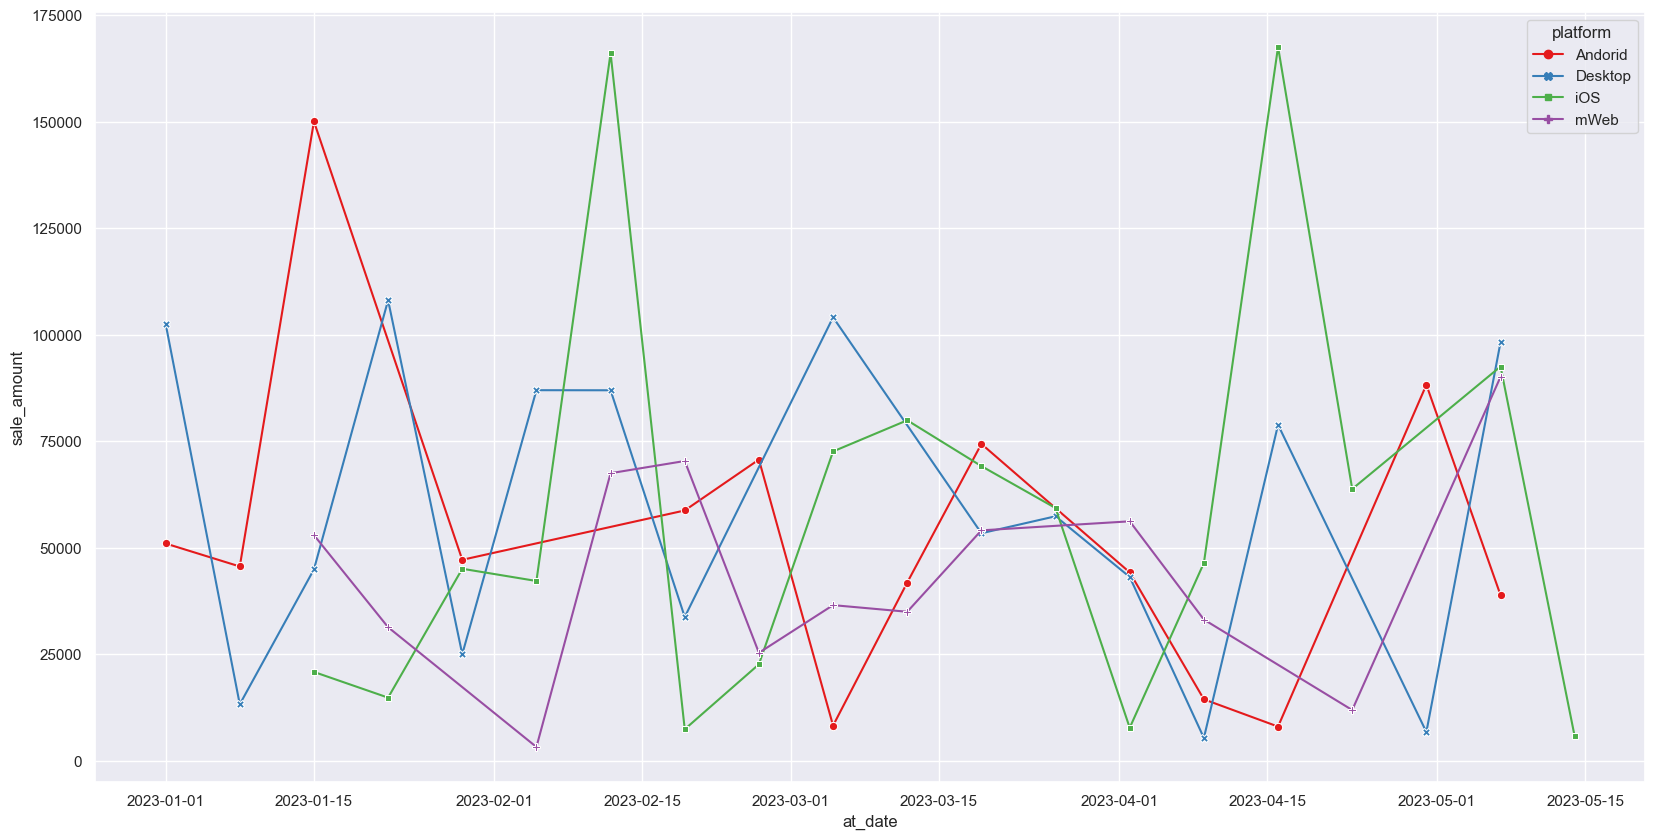

In [116]:
plt.figure(figsize=(20,10))
_ = sns.set(font_scale=1)
g = sns.lineplot(x='at_date', y='sale_amount', 
    data=df_x,
    hue='platform', style='platform', markers=True, dashes=False, palette='Set1')

In [65]:
df_filtered.columns

Index(['_ingested_at', 'lead_id', 'at_date', 'request_amount', 'sale',
       'sale_amount', 'sale_date', 'lead_beendet__kredit_storniert',
       'tracking', 'adID', 'platform'],
      dtype='object')

In [117]:
df_filtered[df_filtered.sale_amount!=0].describe()

,_ingested_at,at_date,request_amount,sale,sale_amount,lead_beendet__kredit_storniert
count,107,107,107.00,107.00,107.00,107.00
mean,2023-05-10 10:48:08.739655424,2023-03-01 16:08:58.317756928,289434.18,0.95,54946.32,0.10
min,2023-05-09 10:50:21.001234,2023-01-01 00:00:00,3296.70,0.00,3095.00,0.00
25%,2023-05-10 11:10:31.001233920,2023-02-03 12:00:00,23411.97,1.00,20355.00,0.00
50%,2023-05-10 11:10:31.001233920,2023-02-28 00:00:00,57669.74,1.00,43218.36,0.00
75%,2023-05-10 11:10:31.001233920,2023-03-30 12:00:00,90712.48,1.00,89205.80,0.00
max,2023-05-10 11:10:31.001234,2023-05-09 00:00:00,15000000.00,1.00,167542.00,1.00
std,NaN,NaN,1727961.25,0.21,40853.50,0.31


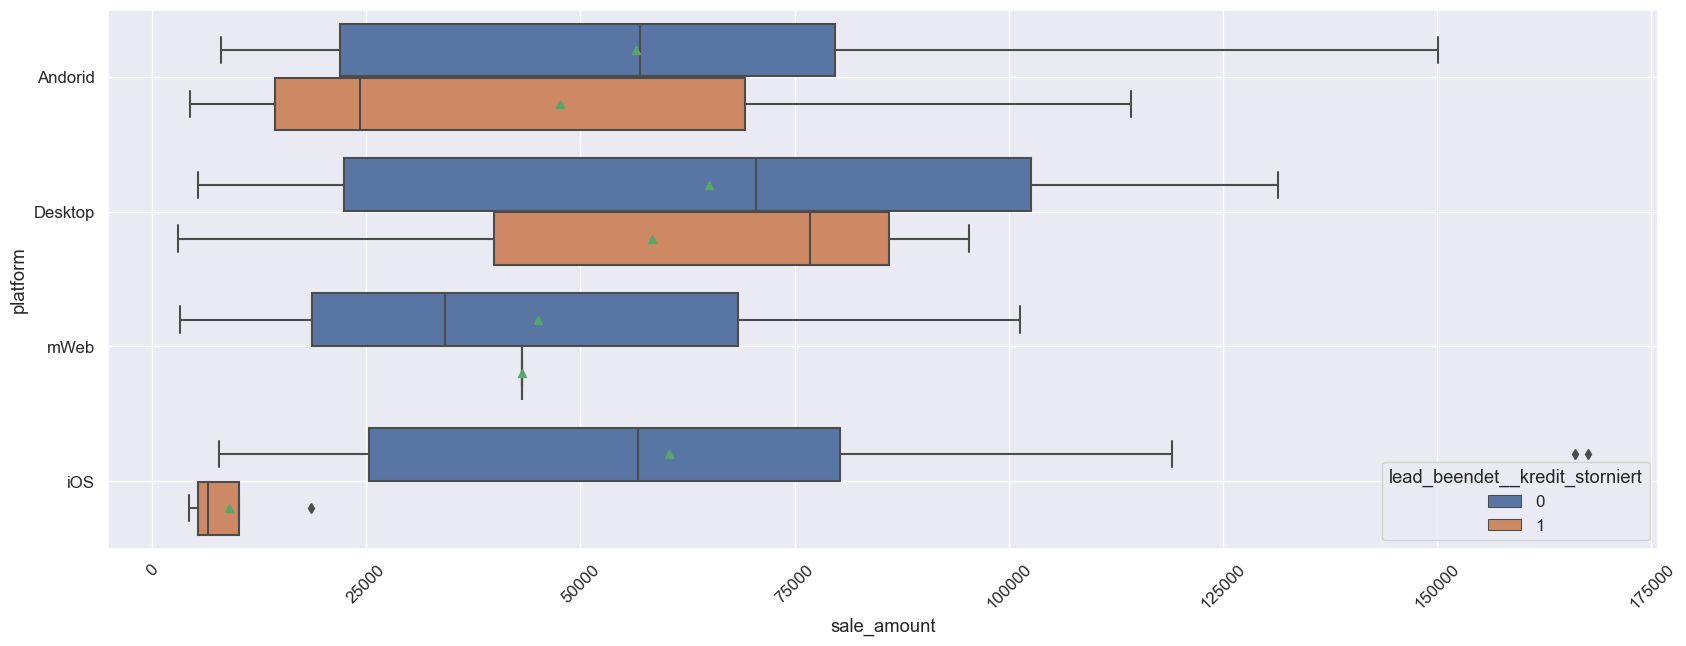

In [120]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,7))
sns.set(font_scale=1.1)
g = sns.boxplot(y="platform", x="sale_amount"
                , hue="lead_beendet__kredit_storniert"
                , data=df_filtered[(df_filtered.sale_amount!=0)]
                , orient='h'
                , showmeans=True)
plt.xticks(rotation=45)
plt.grid(True)

In [ ]:
# Filter the DataFrame for rows where 'Column1' contains the substring 'an'
df_filtered_Andorid = df_filtered[df_filtered['tracking'].str.contains('Andorid')]
df_filtered_Andorid.head(5)

In [ ]:
import sqlite3
from sqlite3 import Error

url="C:/Users/oksan/AppData/Roaming/DBeaverData/workspace6/.metadata/sample-database-sqlite-1/Chinook.db"
# Create a SQL connection to our SQLite database
# handle errors
try:
    con = sqlite3.connect(url)
except Error:
    print(Error)

# Create a SQL cursor object
cur = con.cursor()

# request to the database
cur.execute("SELECT * FROM sales_data")

# fetch the data
records = cur.fetchall()

# create a dataframe from the fetched data
df_sql = pd.DataFrame(records, columns=['_ingested_at', 'lead_id', 'at_date', 'request_amount', 'sale',
       'sale_amount', 'sale_date', 'lead_beendet__kredit_storniert',
       'tracking'])

In [17]:
df_filtered[~df_filtered.sale_amount.isnull()].count()

_ingested_at                      107
lead_id                           107
at_date                           107
request_amount                    107
sale                              107
sale_amount                       107
sale_date                         107
lead_beendet__kredit_storniert    107
tracking                          107
traking_temp                      107
adID                              107
platform                          107
dtype: int64